<a href="https://colab.research.google.com/github/RachidaMellouli/Projects/blob/main/prediction_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
y_train_test = []
init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed

In [ ]:
filenames_list_normal = os.listdir('./drive/MyDrive/projet2/normal/') ## list of file names in the directory
filenames_list_grade1 = os.listdir('./drive/MyDrive/projet2/grade1/')
filenames_list_grade2 = os.listdir('./drive/MyDrive/projet2/grade2/')
filenames_list_grade3 = os.listdir('./drive/MyDrive/projet2/grade3/')
filenames_list_cancer = os.listdir('./drive/MyDrive/projet2/cancer/')
normal_augmented=os.listdir('./drive/MyDrive/projet2/normal_augmented')
grade1_augmented=os.listdir('./drive/MyDrive/projet2/grade1_augmented')
grade2_augmented=os.listdir('./drive/MyDrive/projet2/grade2_augmented')
grade3_augmented=os.listdir('./drive/MyDrive/projet2/grade3_augmented')
cancer_augmented=os.listdir('./drive/MyDrive/projet2/cancer_augmented')
dataSet = [] ## create an empty df that will hold data from each file
y_train_test = []


In [ ]:
i=0
for file_name in tqdm(filenames_list_normal):
    temp_df = cv2.imread('./drive/MyDrive/projet2/normal/' + file_name) ## read from the file to 

    dataSet.append(temp_df) ## add the file data to the main df

    y_train_test.append([1,0,0,0,0])

100%|██████████| 242/242 [00:02<00:00, 84.12it/s] 


In [ ]:
for file_name in tqdm(normal_augmented):
    temp_df = cv2.imread('./drive/MyDrive/projet2/normal_augmented/' + file_name) ## read from the file to df
    dataSet.append(temp_df) ## add the file data to the main df
    y_train_test.append([1,0,0,0,0])

100%|██████████| 1137/1137 [05:27<00:00,  3.47it/s]


In [ ]:
for file_name in tqdm(filenames_list_grade1):
    temp_df = cv2.imread('./drive/MyDrive/projet2/grade1/' + file_name) ## read from the file to df
    dataSet.append(temp_df) ## add the file data to the main df
    y_train_test.append([0,1,0,0,0])

100%|██████████| 182/182 [00:47<00:00,  3.87it/s]


In [ ]:
for file_name in tqdm(grade1_augmented):
    temp_df = cv2.imread('./drive/MyDrive/projet2/grade1_augmented/' + file_name) ## read from the file to df
    dataSet.append(temp_df) ## add the file data to the main df
    y_train_test.append([0,1,0,0,0])

100%|██████████| 1039/1039 [04:33<00:00,  3.80it/s]


In [ ]:
print(dataSet[100].shape)

(128, 128, 3)


In [ ]:

for file_name in tqdm(filenames_list_grade2):
    temp_df = cv2.imread('./drive/MyDrive/projet2/grade2/' + file_name) ## read from the file to df
    dataSet.append(temp_df) ## add the file data to the main df

    y_train_test.append([0,0,1,0,0])

100%|██████████| 146/146 [00:37<00:00,  3.88it/s]


In [ ]:
for file_name in tqdm(grade2_augmented):
    temp_df = cv2.imread('./drive/MyDrive/projet2/grade2_augmented/' + file_name) ## read from the file to df
    dataSet.append(temp_df) ## add the file data to the main df

    y_train_test.append([0,0,1,0,0])

100%|██████████| 979/979 [04:17<00:00,  3.80it/s]


In [ ]:

for file_name in tqdm(filenames_list_grade3):
    temp_df = cv2.imread('./drive/MyDrive/projet2/grade3/' + file_name) ## read from the file to df
    dataSet.append(temp_df) ## add the file data to the main df
    y_train_test.append([0,0,0,1,0])

100%|██████████| 197/197 [00:51<00:00,  3.83it/s]


In [ ]:
for file_name in tqdm(grade3_augmented):
    temp_df = cv2.imread('./drive/MyDrive/projet2/grade3_augmented/' + file_name) ## read from the file to df
    dataSet.append(temp_df) ## add the file data to the main df

    y_train_test.append([0,0,0,1,0])

100%|██████████| 1100/1100 [05:06<00:00,  3.59it/s]


In [ ]:

for file_name in tqdm(filenames_list_cancer):
    temp_df = cv2.imread('./drive/MyDrive/projet2/cancer/' + file_name) ## read from the file to df

    dataSet.append(temp_df) ## add the file data to the main df

    y_train_test.append([0,0,0,0,1])

100%|██████████| 149/149 [00:39<00:00,  3.78it/s]


In [ ]:
for file_name in tqdm(cancer_augmented):
    temp_df = cv2.imread('./drive/MyDrive/projet2/cancer_augmented/' + file_name) ## read from the file to df
    dataSet.append(temp_df) ## add the file data to the main df
    y_train_test.append([0,0,0,0,1])

100%|██████████| 995/995 [04:38<00:00,  3.57it/s]


In [ ]:
import tensorflow as tf

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as pyplot

In [ ]:
y_train_test = np.array(y_train_test)
dataSet = np.array(dataSet)

In [ ]:
print(y_train_test.shape)
print(dataSet.shape)

(6166, 5)
(6166, 128, 128, 3)


(128, 128, 3)


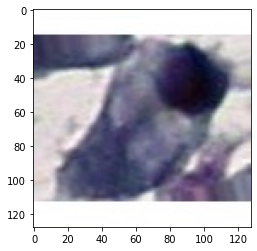

In [ ]:
print(dataSet[1000].shape)
plt.imshow(dataSet[1000])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(dataSet, y_train_test, test_size=0.20, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(4932, 128, 128, 3)
(1234, 128, 128, 3)


In [ ]:
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from tensorflow.keras.optimizers import Adam



def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x


def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters


def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters


def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(128, 128, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(5, activation='softmax')(dense_x)

    return Model(input_img, output)

In [ ]:
dense_block_size = 3
layers_in_block = 4

growth_rate = 12
classes = 5
model_Dense = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
model_Dense.summary()


# training
batch_size = 32
epochs = 50
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_Dense.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
hist2=model_Dense.fit(x_train,y_train, epochs=epochs, batch_size=batch_size, shuffle=True,validation_data=(x_test, y_test))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 24  648         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 128, 128, 24  0           ['conv2d[0][0]']                 
                                )                                                             

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



155/155 [==============================] - 300s 2s/step - loss: 0.5888 - accuracy: 0.3098 - val_loss: 0.5232 - val_accuracy: 0.3355
Epoch 2/50
155/155 [==============================] - 297s 2s/step - loss: 0.4596 - accuracy: 0.4219 - val_loss: 0.4467 - val_accuracy: 0.4652
Epoch 3/50
155/155 [==============================] - 297s 2s/step - loss: 0.4199 - accuracy: 0.4872 - val_loss: 0.4132 - val_accuracy: 0.4814
Epoch 4/50
155/155 [==============================] - 296s 2s/step - loss: 0.3984 - accuracy: 0.5162 - val_loss: 0.3892 - val_accuracy: 0.5065
Epoch 5/50
155/155 [==============================] - 295s 2s/step - loss: 0.3841 - accuracy: 0.5341 - val_loss: 0.3930 - val_accuracy: 0.5008
Epoch 6/50
155/155 [==============================] - 294s 2s/step - loss: 0.3723 - accuracy: 0.5543 - val_loss: 0.3982 - val_accuracy: 0.4781
Epoch 7/50
155/155 [==============================] - 297s 2s/step - loss: 0.3647 - accuracy: 0.5667 - val_loss: 0.3527 - val_accuracy: 0.5632
Epoch 8/50

In [ ]:
print (x_train.shape)

(4932, 128, 128, 3)


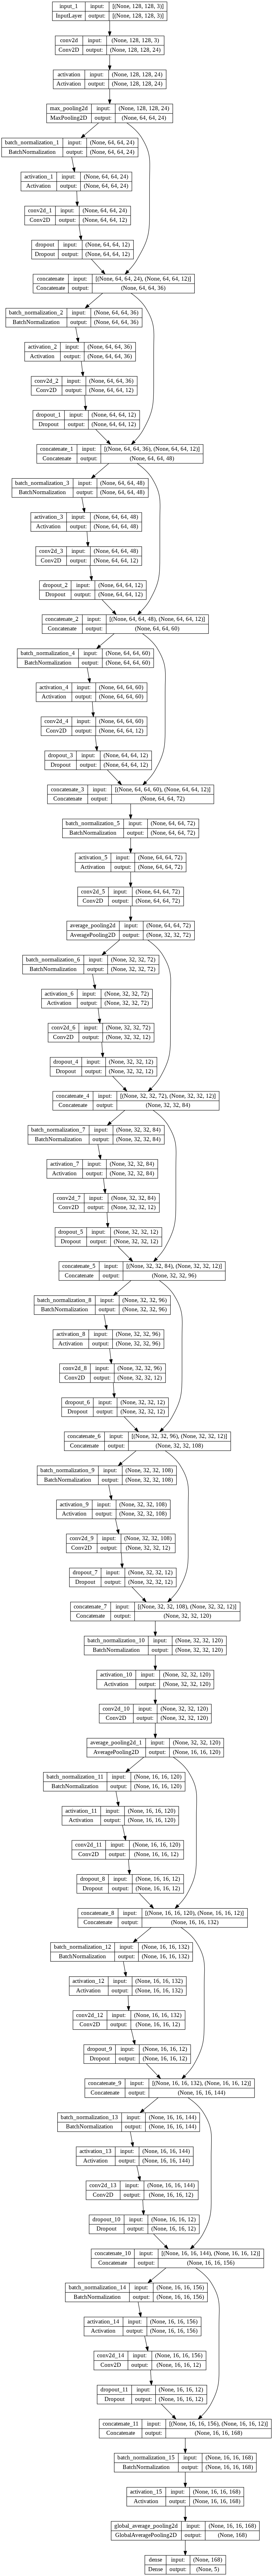

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_Dense, to_file='model_Dense.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
ypred = model_Dense.predict(x_test)
print("DenseNet Model")

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))
print(classification_report(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))


DenseNet Model


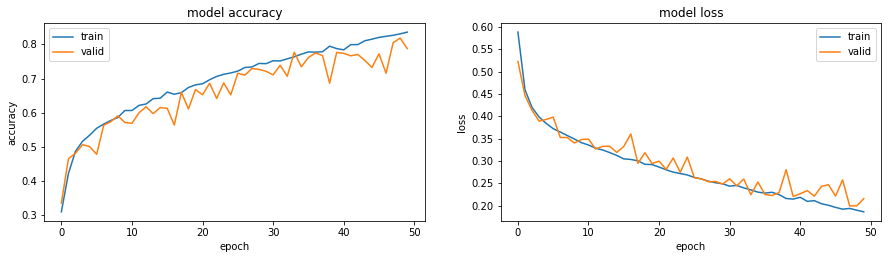

In [ ]:
print("DenseNet Model") 
plt.figure(1, figsize = (15,8)) 
   
plt.subplot(221)  
plt.plot(hist2.history['accuracy'])  
plt.plot(hist2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(hist2.history['loss'])  
plt.plot(hist2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
model_Dense.save('./drive/MyDrive/projet2/my_model_Dense50.h5')

In [ ]:
model=load_model('./drive/MyDrive/projet2/my_model_Dense.h5')


In [ ]:
model=load_model('./drive/MyDrive/projet2/my_model_Dense50.h5')

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
ypred = model.predict(x_test)
print("DenseNet Model")

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))
print(classification_report(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))

39/39 [==============================] - 31s 777ms/step
DenseNet Model
[[270   4   9   9   9]
 [ 14 204  18   6   6]
 [ 17  21 165   4   8]
 [ 24  22  20 130  48]
 [  5   3   9   6 203]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       301
           1       0.80      0.82      0.81       248
           2       0.75      0.77      0.76       215
           3       0.84      0.53      0.65       244
           4       0.74      0.90      0.81       226

    accuracy                           0.79      1234
   macro avg       0.79      0.78      0.78      1234
weighted avg       0.79      0.79      0.78      1234



(128, 128, 3)
1/1 [==============================] - 0s 115ms/step
[[5.9342550e-05 9.9431843e-01 5.5510690e-03 1.5399033e-05 5.5744084e-05]]
la maladie appartient à la grade 1


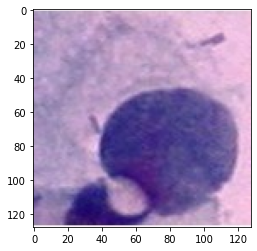

In [ ]:
img_test = x_test[130]
print(img_test.shape)
plt.imshow(img_test)
img_test = img_test.reshape(1,128, 128, 3)
predi=model.predict(img_test)
print(predi)
a=predi.item(0)
b=predi.item(1)
c=predi.item(2)
d=predi.item(3)
e=predi.item(4)
if a>0.5 : 
  print("le patient est dans l'état normal")
elif b>0.5 : 
  print("la maladie appartient à la grade 1")
elif c>0.5 : 
  print("la maladie appartient à la grade 2")
elif d>0.5 : 
  print("la maladie appartient à la grade 3")
elif e>0.5 : 
  print("le patient est dans l'état du cancer")

In [ ]:
print(predi)

[[9.9641269e-01 8.1494311e-04 2.9740037e-04 5.5397977e-04 1.9209406e-03]]


In [ ]:
a=predi.item(0)
b=predi.item(1)
c=predi.item(2)
d=predi.item(3)
e=predi.item(4)
if a>0.5 : 
  print("le patient est dans l'état normal")
elif b>0.5 : 
  print("la maladie appartient à la grade 1")
elif c>0.5 : 
  print("la maladie appartient à la grade 2")
elif d>0.5 : 
  print("la maladie appartient à la grade 3")
elif e>0.5 : 
  print("le patient est dans l'état du cancer")

le patient est dans l'état normal


(128, 128, 3)
1/1 [==============================] - 0s 46ms/step
[[0.00804691 0.01146298 0.01048469 0.9527165  0.01728894]]
la maladie appartient à la grade 3


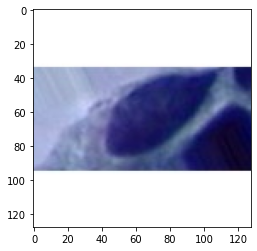

In [ ]:
img_test = x_test[1000]
print(img_test.shape)
plt.imshow(img_test)
img_test = img_test.reshape(1,128, 128, 3)
predi=model.predict(img_test)
print(predi)
a=predi.item(0)
b=predi.item(1)
c=predi.item(2)
d=predi.item(3)
e=predi.item(4)
if a>0.5 : 
  print("le patient est dans l'état normal")
elif b>0.5 : 
  print("la maladie appartient à la grade 1")
elif c>0.5 : 
  print("la maladie appartient à la grade 2")
elif d>0.5 : 
  print("la maladie appartient à la grade 3")
elif e>0.5 : 
  print("le patient est dans l'état du cancer")

In [ ]:
print(predi)

[[0.00804691 0.01146298 0.01048469 0.9527165  0.01728894]]


In [ ]:
len(y_train_test)

6166

(128, 128, 3)
1/1 [==============================] - 0s 46ms/step
[[1.4821127e-06 9.9998748e-01 5.7061548e-06 5.3031163e-06 1.4645683e-07]]
la maladie appartient à la grade 1


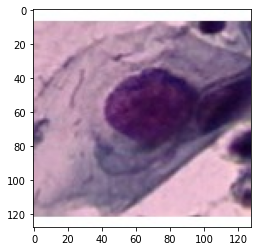

In [ ]:
img_test = x_test[1200]
print(img_test.shape)
plt.imshow(img_test)
img_test = img_test.reshape(1,128, 128, 3)
predi=model.predict(img_test)
print(predi)
a=predi.item(0)
b=predi.item(1)
c=predi.item(2)
d=predi.item(3)
e=predi.item(4)
if a>0.5 : 
  print("le patient est dans l'état normal")
elif b>0.5 : 
  print("la maladie appartient à la grade 1")
elif c>0.5 : 
  print("la maladie appartient à la grade 2")
elif d>0.5 : 
  print("la maladie appartient à la grade 3")
elif e>0.5 : 
  print("le patient est dans l'état du cancer")

In [ ]:
print(predi)

[[1.4821127e-06 9.9998748e-01 5.7061548e-06 5.3031163e-06 1.4645683e-07]]


(128, 128, 3)
1/1 [==============================] - 0s 46ms/step
[[0.05909546 0.14829513 0.01166437 0.68601394 0.09493102]]
la maladie appartient à la grade 3


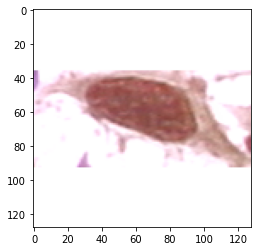

In [ ]:
img_test = x_test[500]
print(img_test.shape)
plt.imshow(img_test)
img_test = img_test.reshape(1,128, 128, 3)
predi=model.predict(img_test)
print(predi)
a=predi.item(0)
b=predi.item(1)
c=predi.item(2)
d=predi.item(3)
e=predi.item(4)
if a>0.5 : 
  print("le patient est dans l'état normal")
elif b>0.5 : 
  print("la maladie appartient à la grade 1")
elif c>0.5 : 
  print("la maladie appartient à la grade 2")
elif d>0.5 : 
  print("la maladie appartient à la grade 3")
elif e>0.5 : 
  print("le patient est dans l'état du cancer")

In [ ]:
print(predi)

[[0.05909546 0.14829513 0.01166437 0.68601394 0.09493102]]


(128, 128, 3)
1/1 [==============================] - 0s 47ms/step
[[6.0020942e-05 9.4659673e-04 8.5963294e-02 7.4000185e-04 9.1229010e-01]]
le patient est dans l'état du cancer


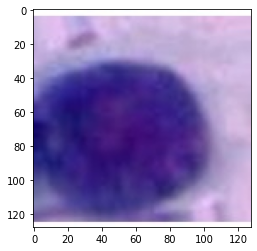

In [ ]:
img_test = x_test[700]
print(img_test.shape)
plt.imshow(img_test)
img_test = img_test.reshape(1,128, 128, 3)
predi=model.predict(img_test)
print(predi)
a=predi.item(0)
b=predi.item(1)
c=predi.item(2)
d=predi.item(3)
e=predi.item(4)
if a>0.5 : 
  print("le patient est dans l'état normal")
elif b>0.5 : 
  print("la maladie appartient à la grade 1")
elif c>0.5 : 
  print("la maladie appartient à la grade 2")
elif d>0.5 : 
  print("la maladie appartient à la grade 3")
elif e>0.5 : 
  print("le patient est dans l'état du cancer")

In [ ]:
print(predi)

[[6.0020942e-05 9.4659673e-04 8.5963294e-02 7.4000185e-04 9.1229010e-01]]


(128, 128, 3)
1/1 [==============================] - 0s 149ms/step
[[3.8127609e-02 3.4019016e-04 9.6130776e-01 9.9341698e-05 1.2505084e-04]]
la maladie appartient à la grade 2


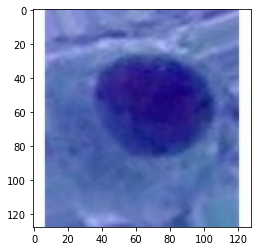

In [ ]:
img_test = x_test[250]
print(img_test.shape)
plt.imshow(img_test)
img_test = img_test.reshape(1,128, 128, 3)
predi=model.predict(img_test)
print(predi)
a=predi.item(0)
b=predi.item(1)
c=predi.item(2)
d=predi.item(3)
e=predi.item(4)
if a>0.5 : 
  print("le patient est dans l'état normal")
elif b>0.5 : 
  print("la maladie appartient à la grade 1")
elif c>0.5 : 
  print("la maladie appartient à la grade 2")
elif d>0.5 : 
  print("la maladie appartient à la grade 3")
elif e>0.5 : 
  print("le patient est dans l'état du cancer")

In [ ]:
print(predi)

[[0.04460236 0.01489665 0.03535077 0.75434524 0.150805  ]]
